In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
import lightgbm as lgbm

In [2]:
import functions

# Преобразование входных файлов

In [3]:
energy = pd.read_csv(r'data/energy.csv', sep='\t', encoding = "utf-8", parse_dates=['Дата']) 
df_energy = functions.energy_preprocessing(energy)

In [4]:
df_energy

,DateTime,Character_day,Trade_hour,Character_hour,target
0,2015-01-01,1,0,1,0.362
1,2015-01-01,1,1,1,0.355
2,2015-01-01,1,2,1,0.355
3,2015-01-01,1,3,1,0.355
4,2015-01-01,1,4,1,0.364
...,...,...,...,...,...
26299,2017-12-31,1,19,0,0.159
26300,2017-12-31,1,20,0,0.152
26301,2017-12-31,1,21,0,0.154
26302,2017-12-31,1,22,1,0.146


In [5]:
plans = pd.read_csv(r'data/plan.csv', sep='\t', encoding = "utf-8",  parse_dates=['DateTime']) 
df_plans = functions.plans_preprocessing(plans)

In [6]:
with pd.option_context('display.max_columns', None):
    display(df_plans)

,DateTime,product_1_plan,product_1_plan_cumsum,product_1_fact,product_1_fact_cumsum,product_2_plan,product_2_plan_cumsum,product_2_fact,product_2_fact_cumsum,product_2_accomplished,product_3_plan,product_3_plan_cumsum,product_3_fact,product_3_fact_cumsum,product_3_accomplished,product_4_plan,product_4_plan_cumsum,product_4_fact,product_4_fact_cumsum,product_4_accomplished,product_2_nan,product_2_gas_off,product_2_reserv,product_2_repair,product_2_то,product_2_nan,product_3_nan,product_3_reserv,product_3_repair,product_3_то,product_3_nan,product_4_nan,product_4_reserv,product_4_repair,product_4_то,product_4_nan
0,2015-09-01,1500.0,1500.0,1317.735,1317.735,100.0,100.0,530.009,530.009,530.009000,25.0,25.0,81.011,81.011,324.044000,5.0,5.0,7.997,7.997,159.940,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,2015-09-02,800.0,2300.0,755.753,2073.488,950.0,1050.0,979.918,1509.927,143.802571,25.0,50.0,28.002,109.013,218.026000,5.0,10.0,5.600,13.597,135.970,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,2015-09-03,800.0,3100.0,729.503,2802.991,950.0,2000.0,1022.824,2532.751,126.637550,25.0,75.0,28.018,137.031,182.708000,5.0,10.0,6.004,19.601,196.010,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,2015-09-04,800.0,3900.0,836.252,3639.243,950.0,2950.0,969.786,3502.537,118.730068,25.0,100.0,33.785,170.816,170.816000,5.0,15.0,8.008,27.609,184.060,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,2015-09-05,800.0,4700.0,707.373,4346.616,950.0,3900.0,948.310,4450.847,114.124282,25.0,125.0,38.857,209.673,167.738400,5.0,20.0,5.596,33.205,166.025,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,2017-12-27,0.0,10000.0,0.000,10477.026,50.0,10700.0,0.000,10768.460,100.639813,0.0,600.0,0.000,741.754,123.625667,2.0,100.0,5.625,146.621,146.621,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
849,2017-12-28,0.0,10000.0,0.000,10477.026,50.0,10700.0,0.000,10768.460,100.639813,0.0,600.0,0.000,741.754,123.625667,2.0,100.0,3.233,149.854,149.854,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
850,2017-12-29,0.0,10000.0,0.000,10477.026,50.0,10700.0,0.000,10768.460,100.639813,0.0,600.0,0.000,741.754,123.625667,2.0,100.0,0.000,149.854,149.854,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
851,2017-12-30,0.0,10000.0,0.000,10477.026,0.0,10700.0,0.000,10768.460,100.639813,0.0,600.0,0.000,741.754,123.625667,0.0,100.0,0.000,149.854,149.854,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


# Распределение признаков и целевой переменной

<Figure size 720x432 with 0 Axes>

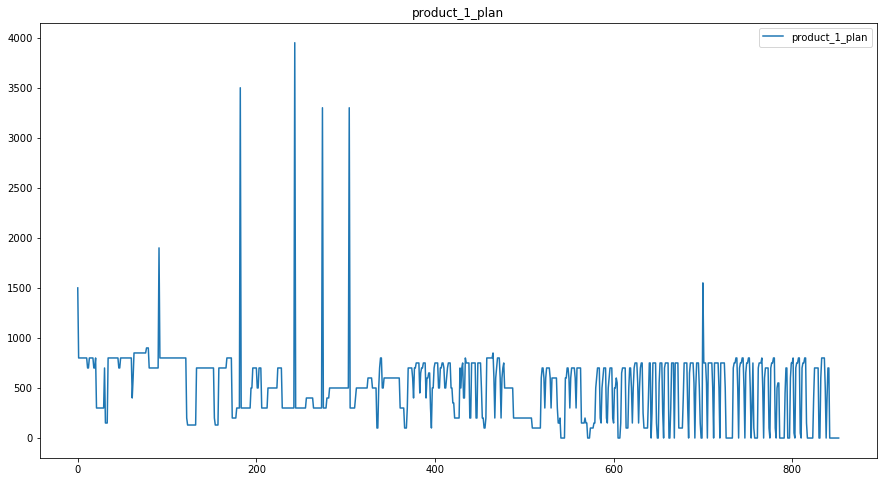

<Figure size 720x432 with 0 Axes>

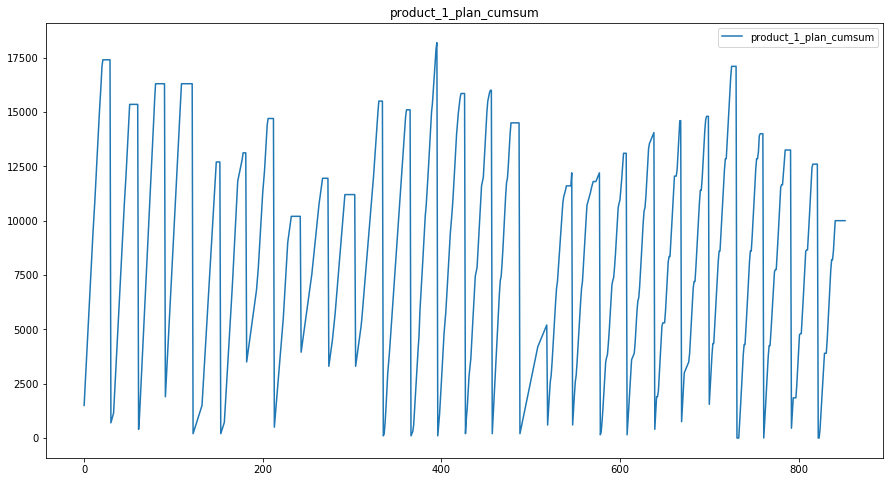

<Figure size 720x432 with 0 Axes>

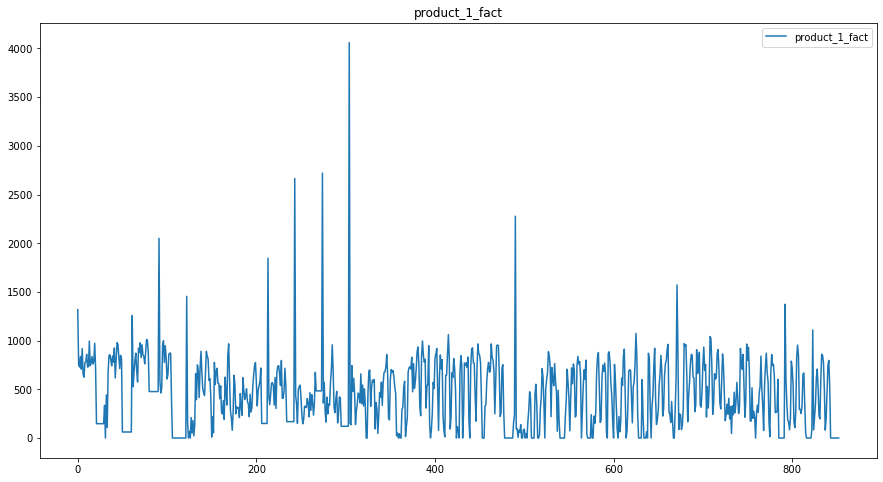

<Figure size 720x432 with 0 Axes>

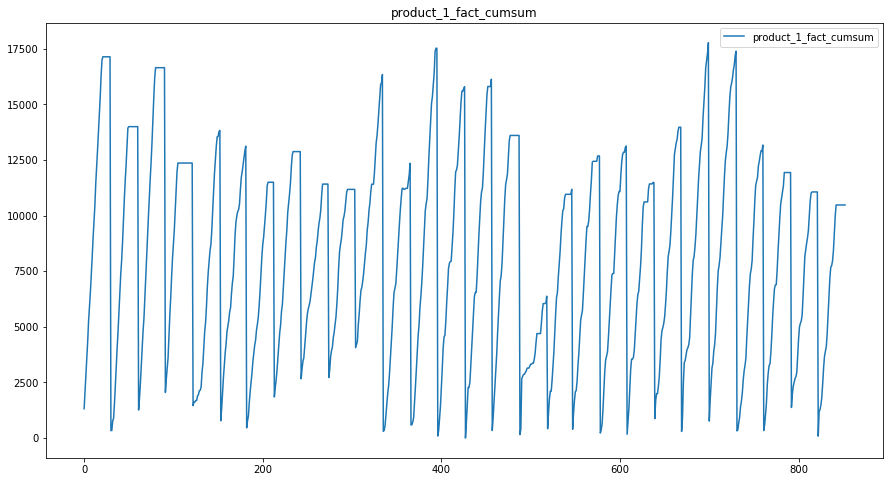

<Figure size 720x432 with 0 Axes>

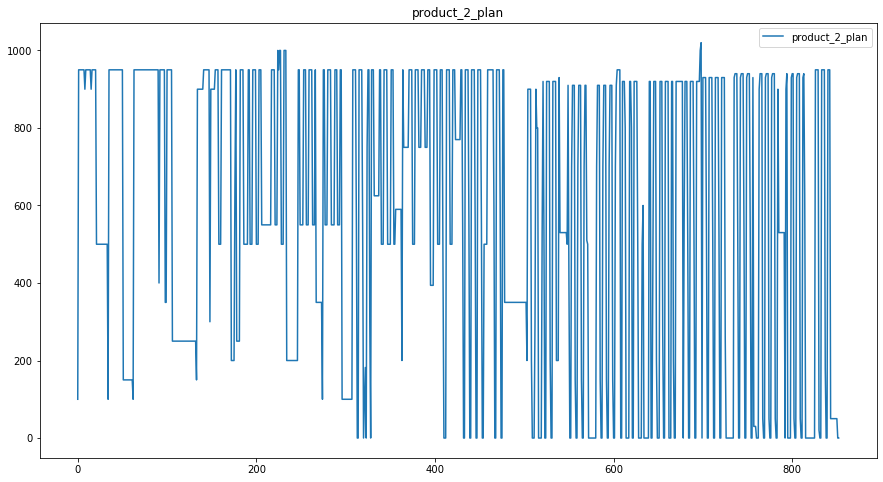

<Figure size 720x432 with 0 Axes>

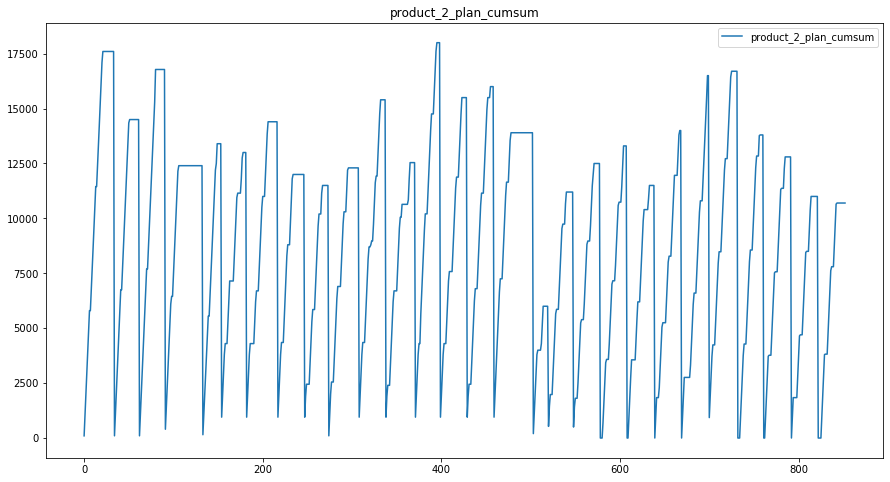

<Figure size 720x432 with 0 Axes>

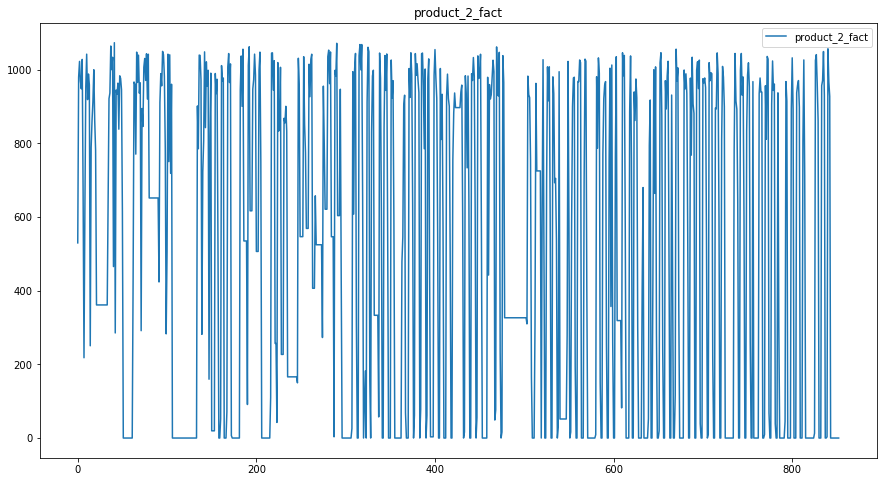

<Figure size 720x432 with 0 Axes>

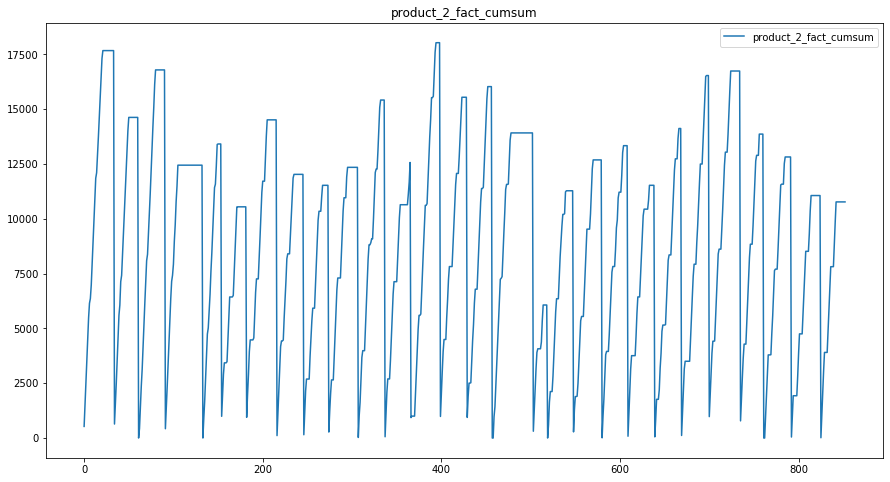

<Figure size 720x432 with 0 Axes>

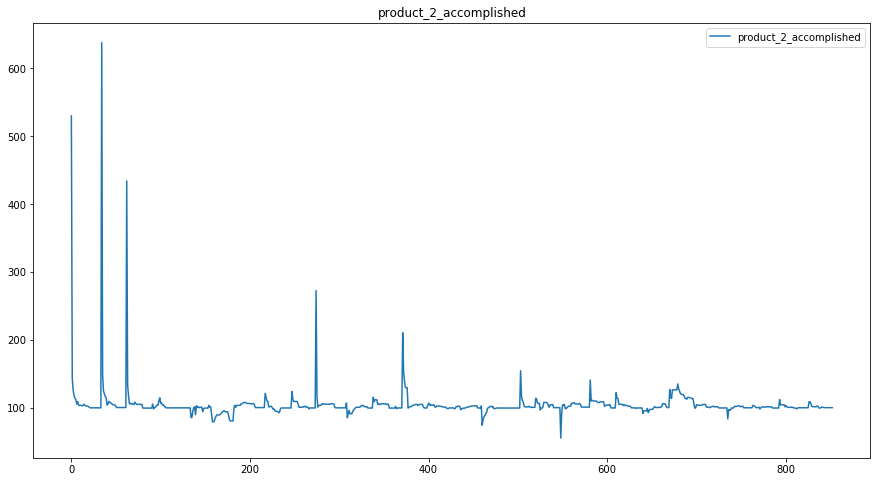

<Figure size 720x432 with 0 Axes>

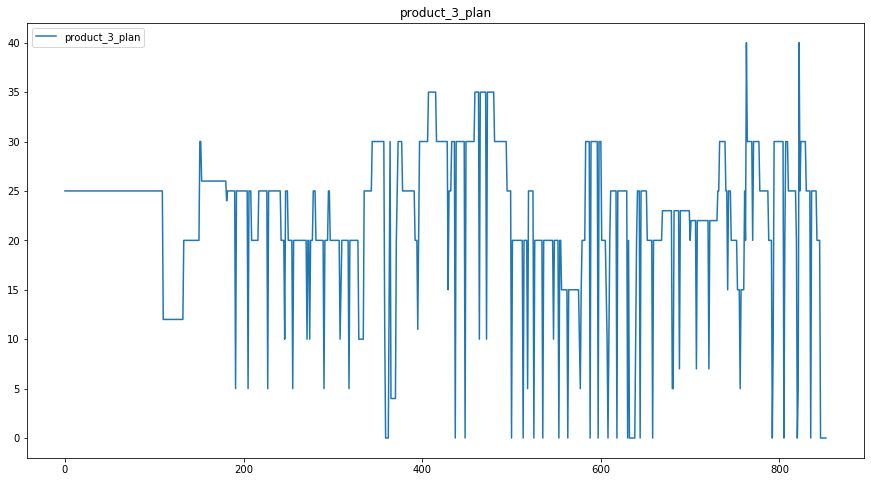

<Figure size 720x432 with 0 Axes>

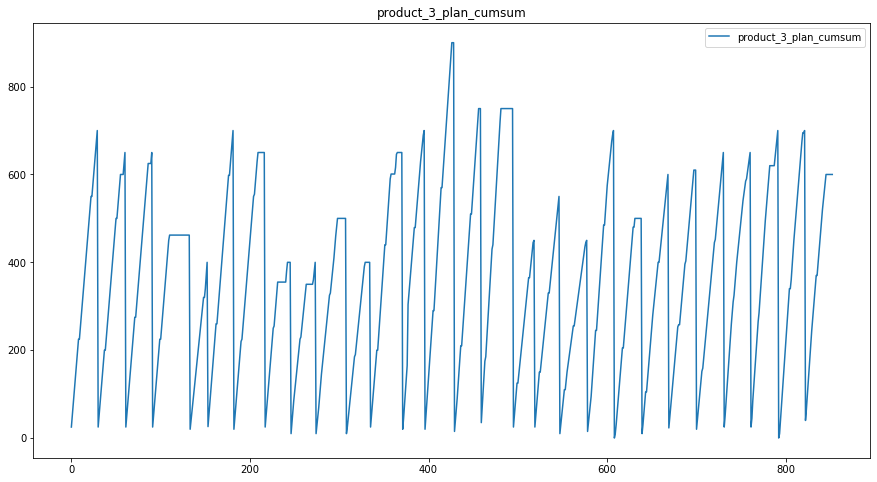

<Figure size 720x432 with 0 Axes>

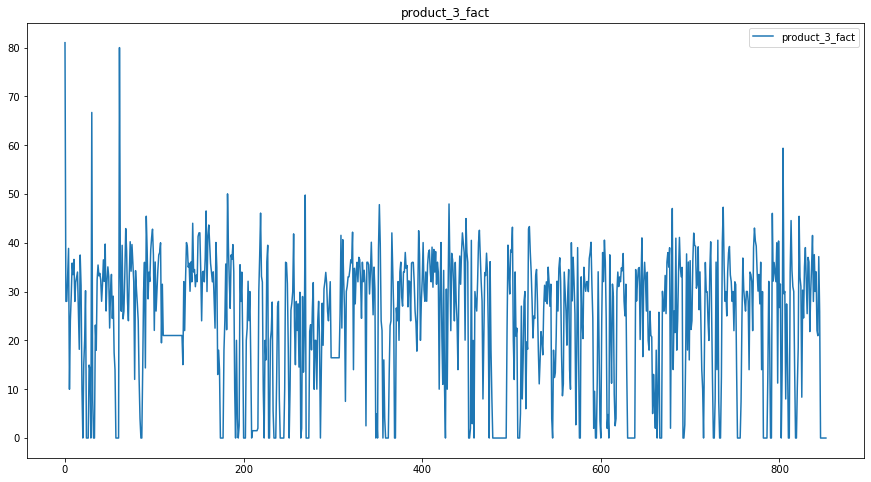

<Figure size 720x432 with 0 Axes>

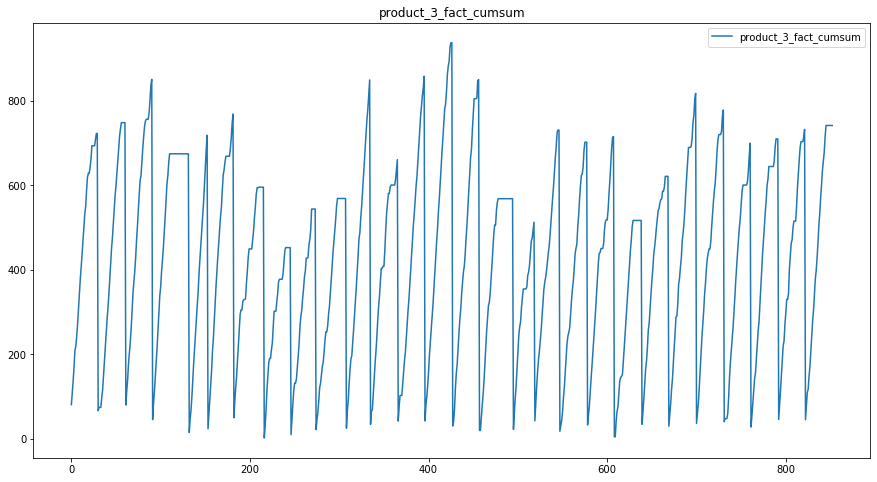

<Figure size 720x432 with 0 Axes>

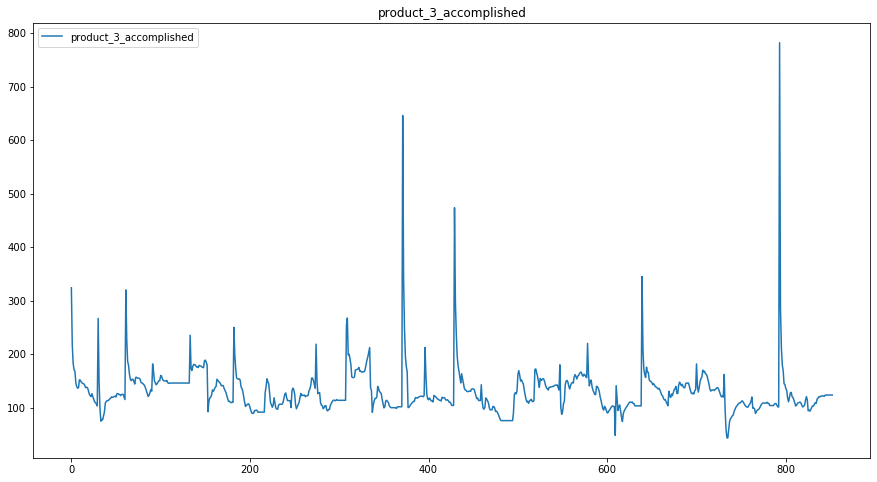

<Figure size 720x432 with 0 Axes>

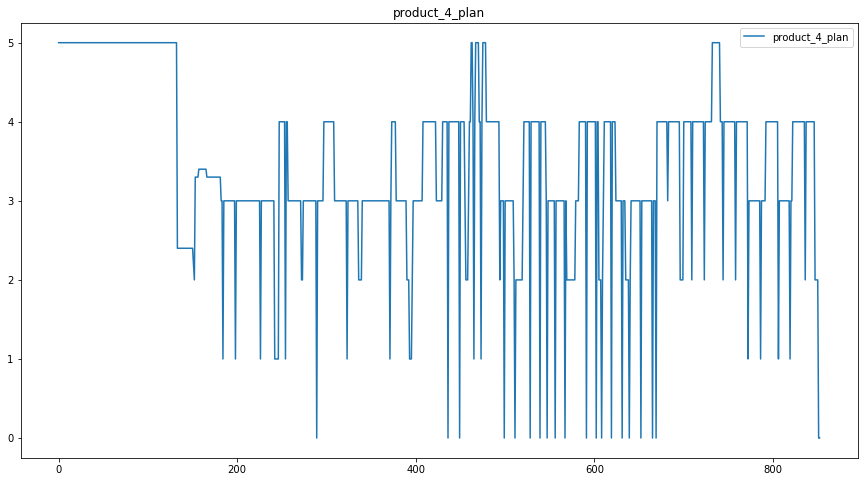

<Figure size 720x432 with 0 Axes>

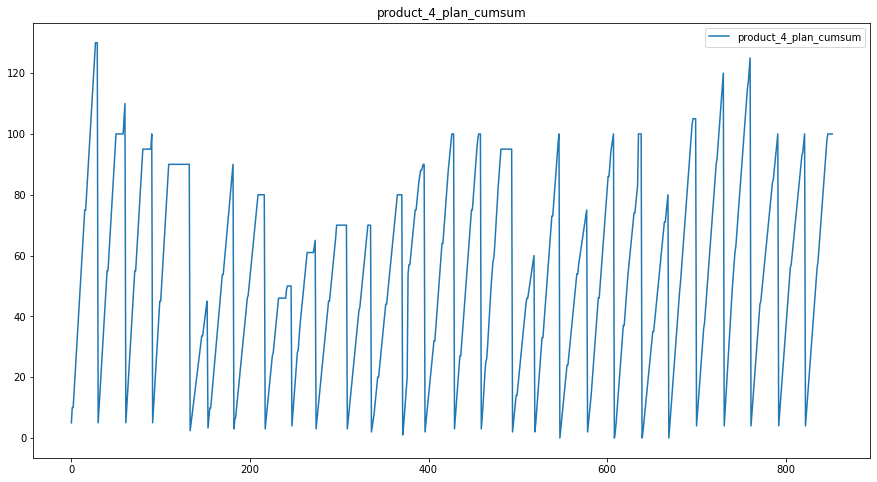

<Figure size 720x432 with 0 Axes>

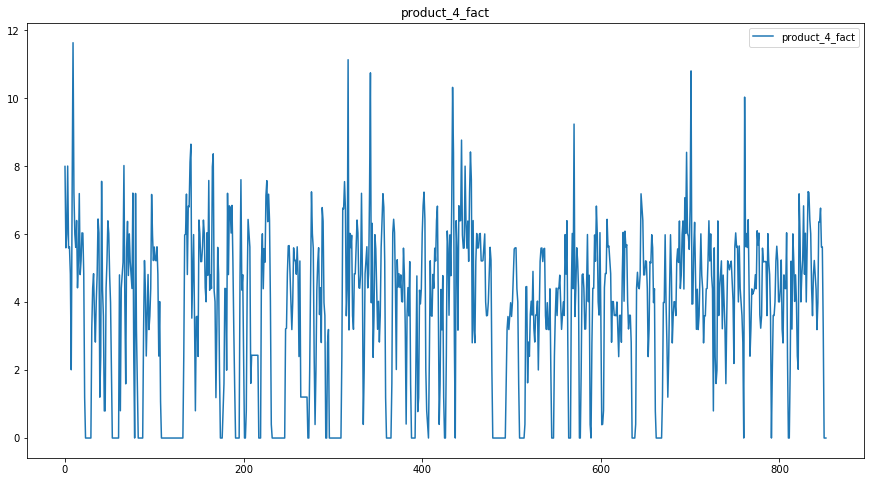

<Figure size 720x432 with 0 Axes>

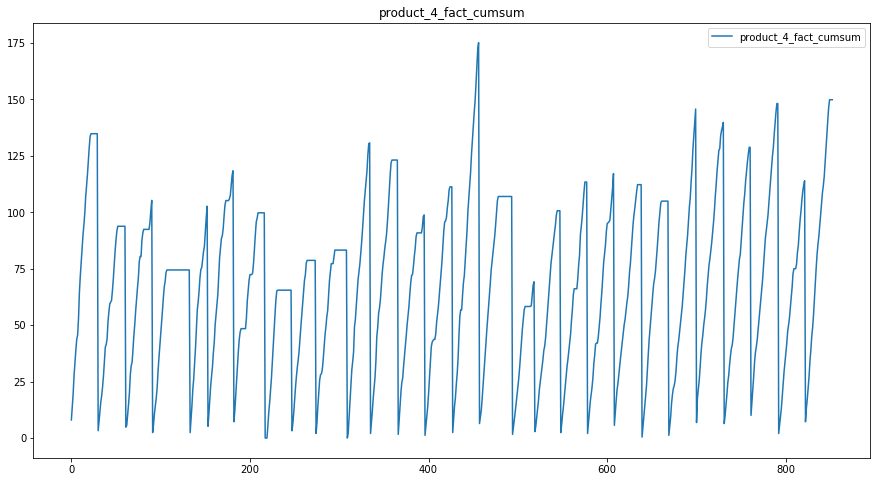

<Figure size 720x432 with 0 Axes>

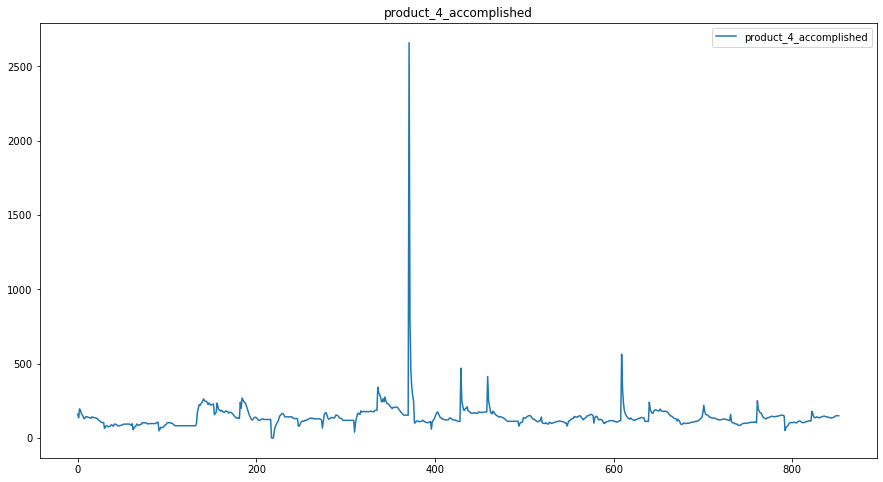

In [7]:
for col in df_plans.columns[1:20]:
    plt.figure(figsize=(10,6))  
    df_plans[[col]].plot(figsize=(15,8), title = col)
    plt.show()


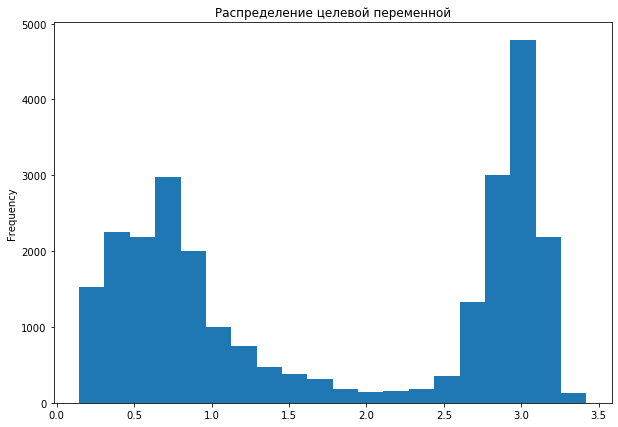

In [45]:
df_energy.target.plot(kind='hist', figsize=(10,7), bins=20, title='Распределение целевой переменной')

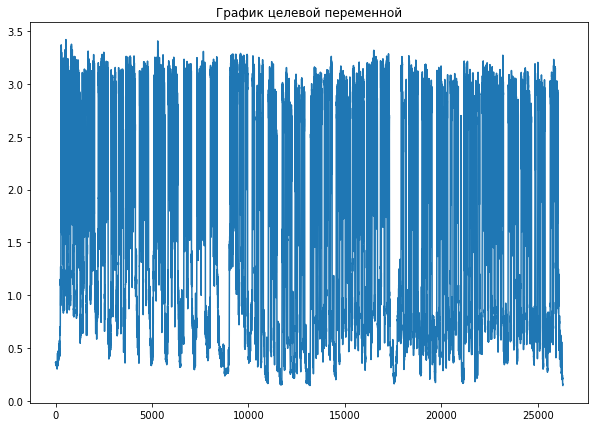

In [9]:
df_energy.target.plot(figsize=(10,7), title='График целевой переменной')

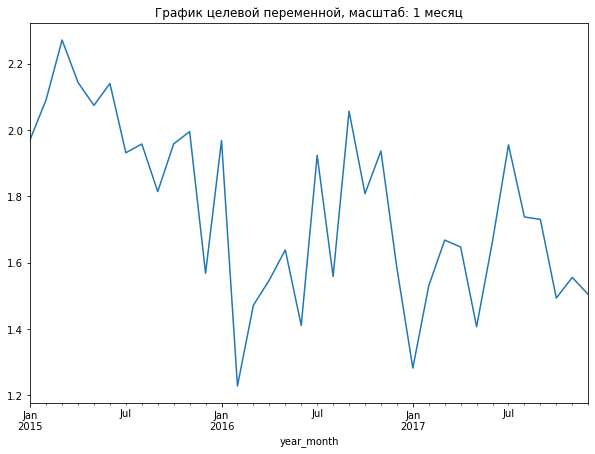

In [10]:
df_energy.assign(year_month = lambda x: x.DateTime - pd.offsets.MonthEnd() + pd.offsets.MonthBegin())\
       .groupby('year_month')['target'].mean().plot(figsize=(10,7), title='График целевой переменной, масштаб: 1 месяц')

# Генерация признаков

In [11]:
df_res = functions.feature_generating(df_energy, df_plans)

In [12]:
with pd.option_context('display.max_columns', None):
    display(df_res)

,DateTime,product_1_plan,product_1_plan_cumsum,product_1_fact,product_1_fact_cumsum,product_2_plan,product_2_plan_cumsum,product_2_fact,product_2_fact_cumsum,product_2_accomplished,product_3_plan,product_3_plan_cumsum,product_3_fact,product_3_fact_cumsum,product_3_accomplished,product_4_plan,product_4_plan_cumsum,product_4_fact,product_4_fact_cumsum,product_4_accomplished,product_2_nan,product_2_gas_off,product_2_reserv,product_2_repair,product_2_то,product_2_nan,product_3_nan,product_3_reserv,product_3_repair,product_3_то,product_3_nan,product_4_nan,product_4_reserv,product_4_repair,product_4_то,product_4_nan,month,target_mean,pkt_change,pkt_change_2,pkt_change_3,MA_2,MA_3,Character_day,Trade_hour,Character_hour,target,product_1_plan/product_1_plan_cumsum,product_2_plan/product_2_plan_cumsum,product_3_plan/product_3_plan_cumsum,product_4_plan/product_4_plan_cumsum
0,2015-09-04,800.0,4700.0,836.252,3639.243,950.0,3900.0,969.786,3502.537,118.730068,25.0,125.0,33.785,170.816,170.816000,5.0,20.0,8.008,27.609,184.060,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,9,2.764208,0.809034,0.393434,2.329666,1.194542,1.164417,0,0,1,3.036,0.170213,0.24359,0.2,0.25
1,2015-09-04,800.0,4700.0,836.252,3639.243,950.0,3900.0,969.786,3502.537,118.730068,25.0,125.0,33.785,170.816,170.816000,5.0,20.0,8.008,27.609,184.060,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,9,2.764208,0.809034,0.393434,2.329666,1.194542,1.164417,0,1,1,2.175,0.170213,0.24359,0.2,0.25
2,2015-09-04,800.0,4700.0,836.252,3639.243,950.0,3900.0,969.786,3502.537,118.730068,25.0,125.0,33.785,170.816,170.816000,5.0,20.0,8.008,27.609,184.060,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,9,2.764208,0.809034,0.393434,2.329666,1.194542,1.164417,0,2,1,1.164,0.170213,0.24359,0.2,0.25
3,2015-09-04,800.0,4700.0,836.252,3639.243,950.0,3900.0,969.786,3502.537,118.730068,25.0,125.0,33.785,170.816,170.816000,5.0,20.0,8.008,27.609,184.060,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,9,2.764208,0.809034,0.393434,2.329666,1.194542,1.164417,0,3,1,1.200,0.170213,0.24359,0.2,0.25
4,2015-09-04,800.0,4700.0,836.252,3639.243,950.0,3900.0,969.786,3502.537,118.730068,25.0,125.0,33.785,170.816,170.816000,5.0,20.0,8.008,27.609,184.060,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,9,2.764208,0.809034,0.393434,2.329666,1.194542,1.164417,0,4,1,1.149,0.170213,0.24359,0.2,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20371,2017-12-30,0.0,10000.0,0.000,10477.026,0.0,10700.0,0.000,10768.460,100.639813,0.0,600.0,0.000,741.754,123.625667,0.0,100.0,0.000,149.854,149.854,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,12,0.181125,-0.331989,-0.341674,-0.470715,0.292875,0.314028,1,19,0,0.213,0.000000,0.00000,0.0,0.00
20372,2017-12-30,0.0,10000.0,0.000,10477.026,0.0,10700.0,0.000,10768.460,100.639813,0.0,600.0,0.000,741.754,123.625667,0.0,100.0,0.000,149.854,149.854,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,12,0.181125,-0.331989,-0.341674,-0.470715,0.292875,0.314028,1,20,0,0.207,0.000000,0.00000,0.0,0.00
20373,2017-12-30,0.0,10000.0,0.000,10477.026,0.0,10700.0,0.000,10768.460,100.639813,0.0,600.0,0.000,741.754,123.625667,0.0,100.0,0.000,149.854,149.854,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,12,0.181125,-0.331989,-0.341674,-0.470715,0.292875,0.314028,1,21,0,0.197,0.000000,0.00000,0.0,0.00
20374,2017-12-30,0.0,10000.0,0.000,10477.026,0.0,10700.0,0.000,10768.460,100.639813,0.0,600.0,0.000,741.754,123.625667,0.0,100.0,0.000,149.854,149.854,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,12,0.181125,-0.331989,-0.341674,-0.470715,0.292875,0.314028,1,22,1,0.199,0.000000,0.00000,0.0,0.00


# Построение модели

### Кросс-валидация для временных рядов, создание генератора индексов 

Удаляются признаки, незначимые для алгоритма в соответствии с feature_importance

In [13]:
#Использеуется сдвиг, чтобы начать предсказывать в каждые 8 утра
df_res2 = df_res.iloc[df_res.Trade_hour.loc[lambda x: x==8].index[0]:df_res.Trade_hour.loc[lambda x: x==8].index[-1]]
X = df_res2.drop(['DateTime', 'target','product_3_reserv', 'product_2_reserv', 'product_2_gas_off',
                 'product_2_nan', 'product_3_repair', 'product_3_то', 'product_2_repair',
                 'product_4_nan', 'product_3_nan', 'product_4_repair', 'product_4_то', 'product_4_nan', 
                 'product_4_reserv', 'product_4_plan', 'product_2_nan', 'product_2_то', 'product_4_plan_cumsum', 
                 'product_3_nan'], axis=1)
          
Y = df_res2['target']

tscv = TimeSeriesSplit(max_train_size= 8760, n_splits=int(X.shape[0]/24-1))
print(tscv)

TimeSeriesSplit(max_train_size=8760, n_splits=847)


In [46]:
with pd.option_context('display.max_columns', None):
    display(X.head(5))

,product_1_plan,product_1_plan_cumsum,product_1_fact,product_1_fact_cumsum,product_2_plan,product_2_plan_cumsum,product_2_fact,product_2_fact_cumsum,product_2_accomplished,product_3_plan,product_3_plan_cumsum,product_3_fact,product_3_fact_cumsum,product_3_accomplished,product_4_fact,product_4_fact_cumsum,product_4_accomplished,month,target_mean,pkt_change,pkt_change_2,pkt_change_3,MA_2,MA_3,Character_day,Trade_hour,Character_hour,product_1_plan/product_1_plan_cumsum,product_2_plan/product_2_plan_cumsum,product_3_plan/product_3_plan_cumsum,product_4_plan/product_4_plan_cumsum
8,800.0,4700.0,836.252,3639.243,950.0,3900.0,969.786,3502.537,118.730068,25.0,125.0,33.785,170.816,170.816,8.008,27.609,184.06,9,2.764208,0.809034,0.393434,2.329666,1.194542,1.164417,0,8,0,0.170213,0.24359,0.2,0.25
9,800.0,4700.0,836.252,3639.243,950.0,3900.0,969.786,3502.537,118.730068,25.0,125.0,33.785,170.816,170.816,8.008,27.609,184.06,9,2.764208,0.809034,0.393434,2.329666,1.194542,1.164417,0,9,2,0.170213,0.24359,0.2,0.25
10,800.0,4700.0,836.252,3639.243,950.0,3900.0,969.786,3502.537,118.730068,25.0,125.0,33.785,170.816,170.816,8.008,27.609,184.06,9,2.764208,0.809034,0.393434,2.329666,1.194542,1.164417,0,10,2,0.170213,0.24359,0.2,0.25
11,800.0,4700.0,836.252,3639.243,950.0,3900.0,969.786,3502.537,118.730068,25.0,125.0,33.785,170.816,170.816,8.008,27.609,184.06,9,2.764208,0.809034,0.393434,2.329666,1.194542,1.164417,0,11,0,0.170213,0.24359,0.2,0.25
12,800.0,4700.0,836.252,3639.243,950.0,3900.0,969.786,3502.537,118.730068,25.0,125.0,33.785,170.816,170.816,8.008,27.609,184.06,9,2.764208,0.809034,0.393434,2.329666,1.194542,1.164417,0,12,0,0.170213,0.24359,0.2,0.25


## Обучение алгоритма LightGBM каждые сутки и предсказание на следующие

В данном случае алгоритм обучается заново каждые сутки, предсказывая следующие. Таким образом, тренировочная выборка растет от 2 суток до размера в пол года, а тестовая всегда равна 24 часам, и соответствующий прогноз сохраняется в отдельный список

In [15]:
grid_params= {'lambda_l1': 1, 
              'lambda_l2': 1, 
              'learning_rate': 0.01, 
              'max_bin': 255, 
              'max_depth': 7, 
              'metric': 'MAE', 
              'n_estimators': 2000}

In [16]:
start_time = time.time()
y_pred_test = []
rg_lgbm = lgbm.LGBMRegressor(**grid_params) 

for train_index, test_index in tscv.split(X):
    if len(train_index)>=48:
         
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        #print("TRAIN:", X_train.shape, "TEST:", X_test.shape)        
        rg_lgbm.fit(X_train, y_train, 
                        eval_set=[(X_test,  y_test)],
                        eval_metric='MAE',
                        early_stopping_rounds=200,
                        verbose=-1)
        
        y_pred_test += list(rg_lgbm.predict(X_test))

print('time: ', time.time() - start_time)  

TRAIN: (48, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.639209
TRAIN: (72, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[736]	valid_0's l1: 0.724054
TRAIN: (96, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.759106
TRAIN: (120, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1]	valid_0's l1: 0.55373
TRAIN: (144, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[142]	valid_0's l1: 0.397676
TRAIN: (168, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[469]	valid_0's l1: 0.344556
TRAIN: (192, 31) TEST: (24, 31)
Training until validation scor

TRAIN: (1296, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[592]	valid_0's l1: 0.0307303
TRAIN: (1320, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1127]	valid_0's l1: 0.0593713
TRAIN: (1344, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[151]	valid_0's l1: 0.10188
TRAIN: (1368, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[499]	valid_0's l1: 0.167996
TRAIN: (1392, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[178]	valid_0's l1: 0.214248
TRAIN: (1416, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[306]	valid_0's l1: 0.464155
TRAIN: (1440, 31) TEST: (24, 31)
Training un

Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[273]	valid_0's l1: 0.0471542
TRAIN: (2544, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[290]	valid_0's l1: 0.0419733
TRAIN: (2568, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[577]	valid_0's l1: 0.0879303
TRAIN: (2592, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[641]	valid_0's l1: 0.0381689
TRAIN: (2616, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[710]	valid_0's l1: 0.0265911
TRAIN: (2640, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[532]	valid_0's l1: 0.0231195
TRAIN: (2664, 31) TEST: (24, 31)
Training until validation scores don't i

TRAIN: (3768, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[794]	valid_0's l1: 0.510997
TRAIN: (3792, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[608]	valid_0's l1: 0.453374
TRAIN: (3816, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1030]	valid_0's l1: 0.119325
TRAIN: (3840, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[445]	valid_0's l1: 0.347281
TRAIN: (3864, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[189]	valid_0's l1: 0.432098
TRAIN: (3888, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[461]	valid_0's l1: 0.145025
TRAIN: (3912, 31) TEST: (24, 31)
Training unt

Early stopping, best iteration is:
[1393]	valid_0's l1: 0.0235311
TRAIN: (5016, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[874]	valid_0's l1: 0.0156254
TRAIN: (5040, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[441]	valid_0's l1: 0.243023
TRAIN: (5064, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1310]	valid_0's l1: 0.216946
TRAIN: (5088, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[356]	valid_0's l1: 0.294887
TRAIN: (5112, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[144]	valid_0's l1: 0.747972
TRAIN: (5136, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1]	val

Early stopping, best iteration is:
[617]	valid_0's l1: 0.424777
TRAIN: (6264, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[1902]	valid_0's l1: 0.0240402
TRAIN: (6288, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[1938]	valid_0's l1: 0.3622
TRAIN: (6312, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1126]	valid_0's l1: 0.630739
TRAIN: (6336, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[831]	valid_0's l1: 0.46836
TRAIN: (6360, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[464]	valid_0's l1: 0.0885452
TRAIN: (6384, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, be

Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[684]	valid_0's l1: 0.17724
TRAIN: (7512, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[671]	valid_0's l1: 0.138561
TRAIN: (7536, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[737]	valid_0's l1: 0.176999
TRAIN: (7560, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[647]	valid_0's l1: 0.128573
TRAIN: (7584, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[525]	valid_0's l1: 0.259077
TRAIN: (7608, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[383]	valid_0's l1: 0.129924
TRAIN: (7632, 31) TEST: (24, 31)
Training until validation scores don't improve 

Early stopping, best iteration is:
[291]	valid_0's l1: 0.154691
TRAIN: (8736, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[499]	valid_0's l1: 0.252756
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[338]	valid_0's l1: 0.649368
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1555]	valid_0's l1: 0.309191
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1693]	valid_0's l1: 0.21509
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[828]	valid_0's l1: 0.269429
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[504]	vali

Early stopping, best iteration is:
[1677]	valid_0's l1: 0.0708925
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[731]	valid_0's l1: 0.334129
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[696]	valid_0's l1: 0.397031
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[911]	valid_0's l1: 0.240508
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[248]	valid_0's l1: 0.163489
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1410]	valid_0's l1: 0.407312
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[536]	va

Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[654]	valid_0's l1: 0.168321
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[725]	valid_0's l1: 0.217466
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1479]	valid_0's l1: 0.264175
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1372]	valid_0's l1: 0.0920364
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1022]	valid_0's l1: 0.106609
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[948]	valid_0's l1: 0.224838
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't imp

Early stopping, best iteration is:
[273]	valid_0's l1: 0.889596
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[733]	valid_0's l1: 0.151849
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[330]	valid_0's l1: 0.481048
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[289]	valid_0's l1: 0.220093
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[491]	valid_0's l1: 0.117083
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[776]	valid_0's l1: 0.207402
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[360]	valid

Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[216]	valid_0's l1: 0.0693457
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[271]	valid_0's l1: 0.096303
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[551]	valid_0's l1: 0.116976
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1349]	valid_0's l1: 0.0572375
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1171]	valid_0's l1: 0.0628194
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1639]	valid_0's l1: 0.590424
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't i

Early stopping, best iteration is:
[1479]	valid_0's l1: 0.223742
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[257]	valid_0's l1: 0.0924407
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[615]	valid_0's l1: 0.242218
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[497]	valid_0's l1: 0.110425
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[711]	valid_0's l1: 0.0890854
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[878]	valid_0's l1: 0.0650182
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1015]	

Early stopping, best iteration is:
[698]	valid_0's l1: 0.0741042
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[582]	valid_0's l1: 0.0952489
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1300]	valid_0's l1: 0.195656
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[1953]	valid_0's l1: 0.136546
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[965]	valid_0's l1: 0.191874
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[567]	valid_0's l1: 0.236748
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteratio

Early stopping, best iteration is:
[392]	valid_0's l1: 0.0189814
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[208]	valid_0's l1: 0.1095
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[332]	valid_0's l1: 0.153116
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[255]	valid_0's l1: 0.0743651
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[492]	valid_0's l1: 0.262557
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[440]	valid_0's l1: 0.304514
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[379]	valid

TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[311]	valid_0's l1: 0.127304
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[204]	valid_0's l1: 0.339807
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[379]	valid_0's l1: 0.0352976
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[904]	valid_0's l1: 0.0296485
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1081]	valid_0's l1: 0.0909556
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[732]	valid_0's l1: 0.288712
TRAIN: (8760, 31) TEST: (24, 31)
Training 

Early stopping, best iteration is:
[859]	valid_0's l1: 0.0770094
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[476]	valid_0's l1: 0.0638675
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1507]	valid_0's l1: 0.0774926
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[598]	valid_0's l1: 0.118435
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[847]	valid_0's l1: 0.138426
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[963]	valid_0's l1: 0.0974201
TRAIN: (8760, 31) TEST: (24, 31)
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[824]	

## Результат предсказания (метрика MAE)

#### На всех данных

In [17]:
mean_absolute_error(Y.iloc[48:], y_pred_test) 

0.22338369552255

#### Для данных от года после начальной даты в датасете

In [18]:
mean_absolute_error(Y.iloc[8808:], y_pred_test[8760:]) #на данных первого года проводилась оптимизация параметров

0.1997171396864721

#### Для данных от 2 лет начальной даты в датасете, прогноз последних 4 месяцев

In [21]:
mean_absolute_error(Y.iloc[17568:], y_pred_test[17520:])

0.16592246344719128

# Важность признаков

In [19]:
rg_lgbm.feature_importances_

array([ 497,  886, 1644,  547,  592,  391, 1598,  602, 1183,  432,  428,
       1541,  598, 1257, 1377,  574, 1295,  675, 2399, 4337, 2052, 1825,
       3306, 1296,  246, 9469,  720, 1266,  398,  736,  698])

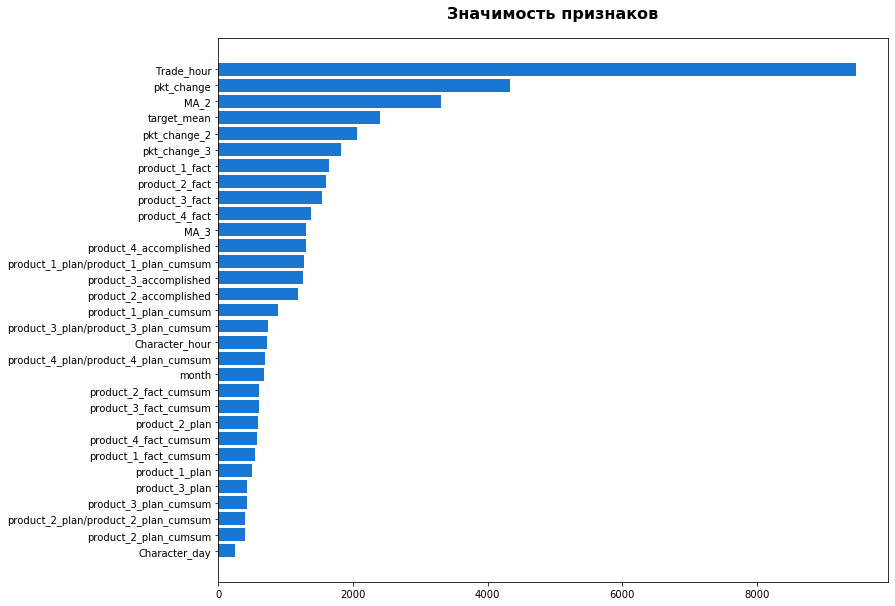

In [20]:
dset = pd.concat([pd.Series(X.columns), pd.Series(rg_lgbm.feature_importances_)], axis=1)\
         .rename(columns={0:'feature', 1:'imp'})\
         .set_index('feature')\
         .sort_values(by='imp', ascending=True)
    
plt.figure(figsize=(12, 10))
plt.barh(y=dset.index, width=dset['imp'], color='#1976D2')
plt.title('Значимость признаков', fontsize=16, fontweight='bold', pad=20)
plt.show()

In [44]:
dset.sort_values(by='imp', ascending=False)/dset.sort_values(by='imp', ascending=False).iloc[0]

,imp
feature,
Trade_hour,1.000000
pkt_change,0.458021
MA_2,0.349139
target_mean,0.253353
pkt_change_2,0.216707
pkt_change_3,0.192734
product_1_fact,0.173619
product_2_fact,0.168761
product_3_fact,0.162742
